首先恭喜各位，通过第一轮的简历筛选，进入线上测试环节。

通过这次线上测试，希望大家能够在限定的时间内，尽自己最大努力，完成一些数据处理和数据建模任务，展现自己对机器学习建模工作的熟悉程度。

## 任务说明
请在这个jupyter notebook中
* 补充完成任务所需要的python代码。可以直接在code cell中编写代码；或者将代码写在.py文件中后在这个notebook中import使用
* 利用markdown cell回答相关的问题或者解释分析思路

完成后，在github上建立一个repo。将这个notebook，相关的.py文件，保存处理结果的excel文件等，push到建立的repo。将repo链接提交给面试官。

## 截止时间
任务的截止提交时间为:

**2019-05-21 10:00:00 a.m**

## 注意事项：
1. 使用python3.6以上版本，如果使用```pandas```等python库，请先升级到最新版本。
2. 请确保面试官在clone各位发布的repo后，能够跑通这个notebook中的代码。
3. 除了实现任务所需的功能，编写的代码具有高可维护性，也是我们非常希望候选人具备的能力。（可参考Refactoring by Kent Beck and Martin Fowler一书中关于"bad code smell"的讨论）
4. 这个测试的目的是检验候选人是否具备高效的完成建模相关工作的能力，不鼓励重复造轮子。建议充分利用```pandas```, ```sklearn```等已有python库完成任务。
5. 请展现自己真实的能力，不要请人代劳。如果候选人试用期阶段表现的实际工作能力明显低于线上测试表现的能力，候选人会被认为采用非诚信手段通过线上测试，将予以坚决辞退。
6. 职场中，Deadline是非常严肃的。无论完成度如何，请务必在截止时间前，提交自己的结果。逾期提交将不予受理。

## 机器学习建模（任务1～任务4）
以下任务基于虚拟的建模数据dataset.csv

建模数据集构成
* id：样本的编号
* dataset：划分了哪些数据用于train, 那些用于test
* label:  0或者1, 只有train数据才给出了label
* 其实字母f开头的列为建模特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model_data = pd.read_csv('model_data.csv')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

### 任务1
对dataset中的建模数据进行分析，描述这个数据集的特点。

例如
* 样本量，特征量
* 建模特征缺失率的分布

候选人请追加其他认为有必要进行的分析，并配合数据可视化手段，支持自己的结论。
 

In [2]:
print(model_data.shape)

(3793, 3277)


由上可知，共3793行，3277列，去掉多余行列后可知共有3792个样本和3274个特征

In [3]:
model_data.isnull().sum()

f_0000     3793
f_0001     3793
f_0002     3793
f_0003     3793
f_0004     3793
f_0005     3793
f_0006     3793
f_0007     3793
f_0008     3793
f_0009     3793
f_0010     3793
f_0011     3793
f_0012     3793
f_0013     3793
f_0014     3793
f_0015     3793
f_0016     3793
f_0017     3793
f_0018     3793
f_0019     3793
f_0020     3793
f_0021     3737
f_0022     3737
f_0023     3733
f_0024     3793
f_0025     3793
f_0026     3793
f_0027     3773
f_0028     3770
f_0029     3765
f_0030     3793
f_0031     3793
f_0032     3793
f_0033     3793
f_0034     3726
f_0035     3719
f_0036     3713
f_0037     3793
f_0038     3793
f_0039     3793
f_0040     3693
f_0041     3686
f_0042     3683
f_0043     3793
f_0044     3793
f_0045     3793
f_0046     3793
f_0047     3793
f_0048     3793
f_0049     3793
f_0050     3786
f_0051     3793
f_0052     3793
f_0053     3793
f_0054     3750
f_0055     3749
f_0056     3746
f_0057     3793
f_0058     3793
f_0059     3793
f_0060     3628
f_0061     3625
f_0062  

显示缺失值的分布情况

In [4]:
data=model_data.dropna(axis=1,thresh =1896)

删除缺失值超过一半的特征，简化数据集

In [5]:
print(data.describe())

            f_0208       f_0209       f_0210       f_0211       f_0214  \
count  3790.000000  3793.000000  3230.000000  3515.000000  3230.000000   
mean      0.484698     0.484050     0.075283     0.075663     0.355096   
std       0.184203     0.591627     0.033536     0.032823     0.093649   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.353162     0.000000     0.059259     0.059259     0.289256   
50%       0.506481     0.000000     0.071605     0.072840     0.355372   
75%       0.618646     1.000000     0.087654     0.088889     0.404959   
max       1.000000     2.000000     1.000000     1.000000     1.000000   

            f_0215       f_0216       f_0217       f_0256       f_0257  \
count  3515.000000  3773.000000  3777.000000  3531.000000  3580.000000   
mean      0.354463     0.297082     0.296816     0.819566     0.414392   
std       0.093306     0.048752     0.047174     0.067262     0.080432   
min       0.000000     0.000000     0

显示了所有特征的数据分布情况，包括平均值，标准差，最值，四分位值等等。注意到所有列中除了f_209，其他特征的值均介于0到1之间。

In [6]:
data1=data[data['dataset'].str.contains('train') ]
train = data1.drop(columns = ['id','dataset'])
data2=data[data['dataset'].str.contains('test') ]
test = data2.drop(columns = ['id','dataset'])

分离训练集和测试集，分别保存在名为train和test的dataframe中

In [7]:
train=train.fillna(train.mean())

用平均值填充所有缺失值

### 任务2

请根据train数据，使用3种指定的机器学习算法（都可以在sklearn中找到）分别训练模型。这3种算法是
* xgboost
* logistic regression
* random forest

要求:
* 预测目标为label列
* 模型优化的目标为auc_roc
* 需要对特征进行筛选。每种算法训练的模型，最后使用的特征控制在20个以内。
* 每种算法得到的模型，将模型在test数据集的预测结果(0~1之间的一个分值)保存在csv文件中。面试官会计算候选人模型在test数据集的auc_roc

In [8]:
def remove_collinear_features(x, threshold):
    y = x['label']
    x = x.drop(columns = ['label'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    x['label'] = y
               
    return x

In [9]:
train = remove_collinear_features(train, 0.6);
train

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


,f_0208,f_0209,f_0210,f_0211,f_0214,f_0215,f_0216,f_0217,f_0256,f_0257,f_0279,f_0280,f_0297,f_0298,f_0299,f_0302,f_0308,f_0321,f_0322,f_0339,f_0340,f_0341,f_0344,f_0349,f_0363,f_0364,f_0381,f_0382,f_0383,f_0386,f_0388,f_0391,f_0392,f_0406,f_0407,f_0424,f_0425,f_0428,f_0493,f_0494,f_0511,f_0512,f_0517,f_0518,f_0577,f_0578,f_0583,f_0584,f_0601,f_0602,f_0676,f_0677,f_0678,f_0679,f_0680,f_0686,f_0783,f_0784,f_0801,f_0802,f_0803,f_0805,f_0806,f_0829,f_0830,f_0847,f_0848,f_0910,f_0911,f_0928,f_0929,f_0931,f_0932,f_0952,f_0953,f_0958,f_0959,f_0970,f_0971,f_0993,f_0994,f_1011,f_1012,f_1081,f_1082,f_1099,f_1100,f_1749,f_1750,f_1767,f_1768,f_1769,f_1772,f_1791,f_1792,f_1809,f_1810,f_1811,f_1814,f_1834,f_1835,f_1837,f_1838,f_1840,f_1841,f_1917,f_1918,f_1935,f_1936,f_1937,f_1939,f_1940,f_1945,f_1946,f_2665,f_2666,f_2667,f_2669,f_2670,f_2675,f_2676,f_2690,f_2691,f_2696,f_2697,f_2702,f_2703,f_2708,f_2709,f_2749,f_2754,f_2773,f_2774,f_2792,f_2796,f_2917,f_2918,f_2919,f_2921,f_2922,f_2924,f_2928,f_3088,f_3089,f_3106,f_3107,f_3108,f_3109,f_3113,f_3114,f_3115,f_3116,f_3117,f_3131,f_3132,f_3149,f_3150,f_3152,f_3153,f_3156,label
0,0.381415,0,0.065432,0.065432,0.272727,0.272727,0.307692,0.302564,0.785714,0.385621,0.121448,0.115832,0.305019,0.504580,0.504173,0.515369,0.0,0.347231,0.350790,0.502281,0.472674,0.472977,0.506235,0.176053,0.547713,0.549267,0.641847,0.397016,0.396598,0.388592,0.0,0.0,0.0,0.445627,0.443820,0.457460,0.457826,0.413508,0.024234,0.024296,0.473803,0.688154,0.323860,0.325045,0.005505,0.005373,0.024897,0.023424,0.351523,0.207255,0.433184,0.433953,0.441618,0.591560,0.706953,0.0,0.056476,0.056101,0.893801,0.698790,0.468179,0.512712,0.511790,0.522925,0.268599,0.375288,0.395713,0.286358,0.288413,0.329240,0.406481,0.413292,0.392501,0.067333,0.068642,0.257951,0.258320,0.503167,0.511161,0.434834,0.437971,0.619856,0.602169,0.263036,0.263189,0.292991,0.695656,0.612400,0.614766,0.374278,0.856473,0.752947,0.509856,0.386650,0.387835,0.658180,0.874761,0.874411,0.829275,0.047615,0.047508,0.000491,0.000474,0.620541,0.616647,0.079627,0.079280,0.434073,0.509173,0.472817,0.609924,0.614854,0.341287,0.409307,0.356060,0.354728,0.263904,0.386217,0.518918,0.520104,0.379844,0.070548,0.070943,0.456432,0.455587,0.440954,0.440827,0.591689,0.591843,0.606063,0.503612,0.446589,0.446099,0.340320,0.655086,0.305458,0.509447,0.508566,0.439322,0.440266,0.0,0.226935,0.034694,0.033822,0.541212,0.477880,0.536886,0.536648,0.0,0.0,0.0,0.164532,0.179092,0.108820,0.116821,0.577750,0.558264,0.509738,0.504239,0.092724,0.0
1,0.381415,0,0.065432,0.065432,0.272727,0.272727,0.296154,0.295385,0.785714,0.385621,0.121448,0.115832,0.305019,0.504580,0.504173,0.515369,0.0,0.347231,0.350790,0.502281,0.472674,0.472977,0.506235,0.176053,0.547713,0.549267,0.641847,0.397016,0.396598,0.388592,0.0,0.0,0.0,0.445627,0.443820,0.457460,0.457826,0.413508,0.024234,0.024296,0.473803,0.688154,0.323860,0.325045,0.005505,0.005373,0.024897,0.023424,0.351523,0.207255,0.433184,0.433953,0.441618,0.591560,0.706953,0.0,0.056476,0.056101,0.893801,0.698790,0.468179,0.512712,0.511790,0.522925,0.268599,0.375288,0.395713,0.286358,0.288413,0.329240,0.406481,0.413292,0.392501,0.067333,0.068642,0.257951,0.258320,0.503167,0.511161,0.434834,0.437971,0.619856,0.602169,0.263036,0.263189,0.292991,0.695656,0.612400,0.614766,0.374278,0.856473,0.752947,0.509856,0.386650,0.387835,0.658180,0.874761,0.874411,0.829275,0.047615,0.047508,0.000491,0.000474,0.620541,0.616647,0.079627,0.079280,0.434073,0.509173,0.472817,0.609924,0.614854,0.341287,0.409307,0.356060,0.354728,0.263904,0.386217,0.518918,0.520104,0.379844,0.070548,0.070943,0.456432,0.455587,0.440954,0.440827,0.591689,0.591843,0.606063,0.503612,0.446589,0.446099,0.340320,0.655086,0.305458,0.509447,0.508566,0.439322,0.440266,0.0,0.226935,0.034694,0.033822,0.541212,0.477880,0.536886,0.536648,0.0,0.0,0.0,0.164532,0.179092,0.108820,0.116821,0.577750,0.558264,0.509738,0.504239,0.092724,0.0
2,0.381415,0,0.065432,0.065432,0.272727,0.272727,0.287912,0.288462,0.785714,0.385621,

对所有特征进行相关性分析并去除了所有相关系数超过0.6的一对特征中的一个特征。
尊敬的面试官，不好意思，我只完成了数据清洗和特征选择的一部分工作，还没有来得及做建模测评的部分，我会尽快完成并再提交。

### 任务3

对xgboost算法中使用的每个特征，进行可视化分析。

例如：
* 特征取值的分布
* 特征和预测目前之间的关系

请候选人追加其他认为有必要进行的分析

### 任务4
如果需要在产品中使用。你会推荐使用之前哪个算法得到的模型？解释为什么。

### 任务5

任务1～任务4体现了从得到建模数据，到完成建模实验的环节。

然而，对于整个建模项目来说，以上环节只是一部分工作内容。请候选人根据自己的经验和理解，描述从接到业务部门的需求开始（假设是一个0，1分类的监督式机器学习任务），到监控模型在产品中的使用情况为止，有哪些重要的工作环节？在这些过程中，机器学习建模工程师和业务部门成员如何分工？如何合作？

建议通过流程图配合必要的文字描述，表达自己的理解。





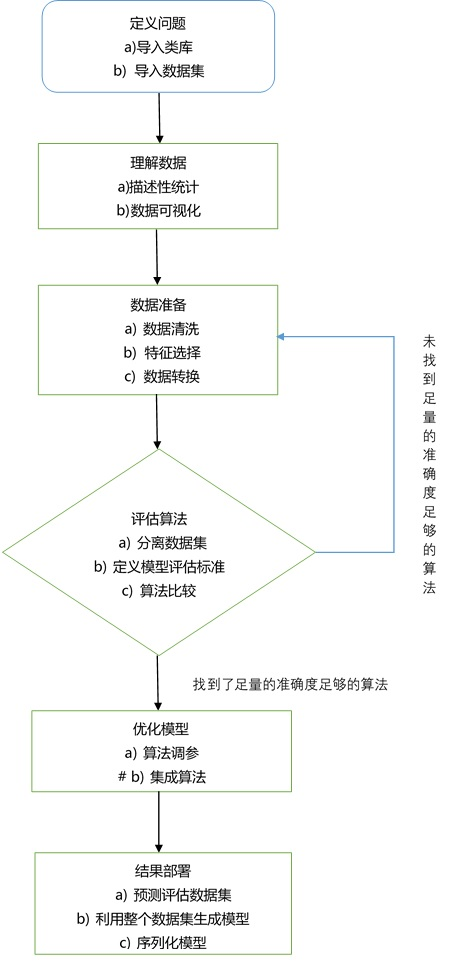
整个建模项目应该有如图的六个主要环节，整个流程都是有循环性的，特别是步骤三和四，直到找到一个足够准确的模型。在工作过程中，建模工程师应该不断进行特征选择，算法评估和优化模型的迭代，业务部门应当根据测试结果反馈模型的好坏。

## 数据处理

### 任务6

history_df中存放了每个id，在不同time，对应的A, B的数值。

In [10]:
history_data = pd.read_csv('history_data.csv', parse_dates=['time'])
history_data


,id,time,A,B
0,1,2019-01-26 08:52:00,3.797676,8.432960
1,1,2019-01-29 14:59:00,NaN,4.157219
2,1,2019-01-13 00:01:00,6.516694,4.922487
3,1,2019-02-01 00:27:00,2.627256,NaN
4,1,2019-03-26 00:32:00,8.939391,NaN
5,2,2019-01-01 00:14:00,NaN,6.449302
6,2,2019-01-26 00:52:00,3.629338,1.529292
7,2,2019-02-04 00:05:00,4.299086,NaN
8,2,2019-02-28 00:51:00,NaN,3.140770
9,2,2019-03-01 00:44:00,6.353059,5.926424


sample_df存放了一些id和obs_time的组合。

In [11]:
sample_df = pd.read_csv('sample.csv')
sample_df

,id,obs_time
0,1,2019/3/7 0:00
1,1,2019/2/1 0:00
2,2,2019/3/15 0:00
3,2,2019/2/1 0:00


对sample_df中每个id和obs_time的组合，计算离obs_time过去10, 60天内， 该id对应的A, B的最大值, 非空记录数量。将结果存在不同的列中。

例如:


最终的结果包含的列:
* id
* obs_time
* 10天内A平均值
* 10天内A非空样本数量
* 60天内A平均值
* 60天内A非空样本数量
* 10天内B平均值
* 10天内B非空样本数量
* 60天内B平均值
* 60天内B非空样本数量

将计算结果存为excel保存